In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("vectorbt_reports/new_expanding_master_backtest_stats.csv")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=['Sharpe Ratio'])
df = df.drop(columns=['Start Value', 'End Value'])
#df = df[df["asset"]=="NVDA"]
#display(df[df["asset"]=="NVDA"])

In [4]:
returns = df['Total Return [%]'] / 100
cumulative_return = (1 + returns).prod() - 1
N = len(returns)  # number of periods
annualized_return = (1 + cumulative_return)**(12 / N) - 1
annualized_volatility = returns.std() * np.sqrt(12)
sharpe_annual = annualized_return / annualized_volatility
print(sharpe_annual)

-0.9182679985993166


In [5]:
def compute_annualized_sharpe(df):
    results = []

    for asset, group in df.groupby("asset"):
        # Convert returns from % to decimals
        returns = group['Total Return [%]'] / 100
        benchmark_returns = group['Benchmark Return [%]'] / 100
        N = len(returns)

        if N < 2:
            continue  # Skip assets with insufficient data

        # Strategy Sharpe
        cumulative_return = (1 + returns).prod() - 1
        annualized_return = (1 + cumulative_return)**(12 / N) - 1
        annualized_volatility = returns.std() * np.sqrt(12)
        sharpe_strategy = annualized_return / annualized_volatility if annualized_volatility > 0 else np.nan

        # Benchmark Sharpe
        cumulative_bench = (1 + benchmark_returns).prod() - 1
        annualized_bench_return = (1 + cumulative_bench)**(12 / N) - 1
        annualized_bench_vol = benchmark_returns.std() * np.sqrt(12)
        sharpe_benchmark = annualized_bench_return / annualized_bench_vol if annualized_bench_vol > 0 else np.nan

        results.append({
            'asset': asset,
            'strategy_sharpe': sharpe_strategy,
            'benchmark_sharpe': sharpe_benchmark
        })

    return pd.DataFrame(results)

In [6]:
df = pd.read_csv("vectorbt_reports/new_expanding_master_backtest_stats.csv")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=['Sharpe Ratio'])
df = df.drop(columns=['Start Value', 'End Value'])
sharpe_df = compute_annualized_sharpe(df)
display(sharpe_df.sort_values(by='strategy_sharpe', ascending=False))

,asset,strategy_sharpe,benchmark_sharpe
3,BTC=F,0.346582,0.571205
9,GC=F,0.017298,2.864663
0,AAPL,-0.348613,0.652176
13,NVDA,-0.449081,-0.209887
8,ES=F,-0.739455,0.789796
12,MSFT,-0.877117,-0.405248
14,TSLA,-0.913867,0.965867
1,AMZN,-1.098914,0.382994
2,BTC-USD,-1.246533,0.647465
5,CL=F,-1.574279,-0.187782


In [3]:
df = pd.read_csv("vectorbt_reports/fixed_master_backtest_stats.csv")
display(df)

# Select relevant columns
selected_columns = [
    'Total Return [%]', 
    'Benchmark Return [%]', 
    'Max Drawdown [%]', 
    'Win Rate [%]', 
    'Sharpe Ratio', 
    'asset'
]

# Filter the dataframe
df_selected = df[selected_columns]

# Convert to LaTeX
latex_table = df_selected.to_latex(index=False, float_format="%.2f")

# Print or save
print(latex_table)


,Start,End,Period,Start Value,End Value,Total Return [%],Benchmark Return [%],Max Gross Exposure [%],Total Fees Paid,Max Drawdown [%],...,Avg Losing Trade [%],Avg Winning Trade Duration,Avg Losing Trade Duration,Profit Factor,Expectancy,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio,asset
0,2024-04-01,2025-04-01,252 days,10000.0,12763.135855,27.631359,31.884879,100.0,3.891495,7.889393,...,-1.195839,14 days 21:00:00,2 days 18:00:00,3.391029,168.915428,1.890167,5.372644,1.431957,2.849301,AAPL
1,2024-04-01 00:00:00,2025-04-01 00:00:00,252 days 00:00:00,10000.0,11929.587093,19.295871,6.188869,100.0,2.592375,13.555664,...,-2.581817,16 days 16:00:00,1 days 16:00:00,2.177158,160.798924,1.152385,2.147997,1.275135,1.645396,AMZN
2,2024-04-01 00:00:00,2025-04-01 00:00:00,262 days 00:00:00,10000.0,10541.679393,5.416794,22.190167,100.0,3.886657,23.280283,...,-3.455448,10 days 12:00:00,1 days 18:00:00,1.133791,27.083970,0.377877,0.327564,1.089958,0.652815,BTC-USD
3,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9973.233071,-0.267669,21.270247,100.0,3.711236,37.992757,...,-3.551627,14 days 16:00:00,3 days 09:36:00,0.994088,-1.274616,0.206169,-0.010158,1.038876,0.324269,BTC=F
4,2024-04-01 00:00:00,2025-03-31 00:00:00,230 days 00:00:00,10000.0,10124.868736,1.248687,2.404336,100.0,3.334157,4.592050,...,-0.612340,10 days 03:00:00,5 days 12:00:00,1.306825,9.548113,0.307619,0.433110,1.057833,0.459644,CHFUSD=X
5,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,8595.017359,-14.049826,-14.944454,100.0,3.717331,27.205431,...,-2.435955,13 days 08:00:00,2 days 19:12:00,0.421731,-90.008649,-0.694181,-0.721243,0.880600,-0.929327,CL=F
6,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,10106.875427,1.068754,-0.723666,100.0,3.313579,4.660589,...,-0.718014,12 days 04:00:00,4 days 12:00:00,1.141685,6.383075,0.314131,0.331615,1.064102,0.442332,DX-Y.NYB
7,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,10032.955647,0.329556,-0.777941,100.0,3.501133,5.215409,...,-0.743627,14 days 00:00:00,3 days 21:49:05.454545454,1.032579,1.569781,0.114599,0.091228,1.022284,0.161116,DX=F
8,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9899.185072,-1.008149,7.162079,100.0,3.709826,10.346833,...,-1.263815,9 days 08:00:00,6 days 14:00:00,0.936357,-5.600829,-0.080533,-0.140255,0.984441,-0.103627,ES=F
9,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,11319.814245,13.198142,39.454500,100.0,4.563121,8.474615,...,-0.884272,7 days 14:00:00,1 days 13:20:00,2.328987,52.708487,1.485892,2.310909,1.356232,2.052984,GC=F


\begin{tabular}{rrrrrl}
\toprule
 Total Return [\%] &  Benchmark Return [\%] &  Max Drawdown [\%] &  Win Rate [\%] &  Sharpe Ratio &    asset \\
\midrule
            27.63 &                 31.88 &              7.89 &         50.00 &          1.89 &     AAPL \\
            19.30 &                  6.19 &             13.56 &         50.00 &          1.15 &     AMZN \\
             5.42 &                 22.19 &             23.28 &         40.00 &          0.38 &  BTC-USD \\
            -0.27 &                 21.27 &             37.99 &         28.57 &          0.21 &    BTC=F \\
             1.25 &                  2.40 &              4.59 &         50.00 &          0.31 & CHFUSD=X \\
           -14.05 &                -14.94 &             27.21 &         28.57 &         -0.69 &     CL=F \\
             1.07 &                 -0.72 &              4.66 &         37.50 &          0.31 & DX-Y.NYB \\
             0.33 &                 -0.78 &              5.22 &         35.29 &          0

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25172\150820651.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_selected.to_latex(index=False, float_format="%.2f")


In [4]:
df = pd.read_csv("vectorbt_reports/classic_stats_per_asset.csv")
display(df)

# Select relevant columns
selected_columns = [
    'Total Return [%]', 
    'Benchmark Return [%]', 
    'Max Drawdown [%]', 
    'Win Rate [%]', 
    'Sharpe Ratio', 
    'asset'
]

# Filter the dataframe
df_selected = df[selected_columns]

# Convert to LaTeX
latex_table = df_selected.to_latex(index=False, float_format="%.2f")

# Print or save
print(latex_table)

,Start,End,Period,Start Value,End Value,Total Return [%],Benchmark Return [%],Max Gross Exposure [%],Total Fees Paid,Max Drawdown [%],...,Avg Losing Trade [%],Avg Winning Trade Duration,Avg Losing Trade Duration,Profit Factor,Expectancy,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio,asset
0,2024-04-01,2025-04-01,252 days,10000.0,11142.244270,11.422443,31.884879,100.0,3.840972,11.833529,...,-2.401765,15 days,3 days,1.437521,68.841915,0.841341,1.433181,1.178851,1.285599,AAPL
1,2024-04-01 00:00:00,2025-04-01 00:00:00,252 days 00:00:00,10000.0,10071.453802,0.714538,6.188869,100.0,3.661420,16.106021,...,-3.091197,16 days 00:00:00,4 days 00:00:00,1.021532,4.209089,0.177311,0.064361,1.032472,0.236228,AMZN
2,2024-04-01 00:00:00,2025-04-01 00:00:00,262 days 00:00:00,10000.0,5862.705209,-41.372948,22.190167,100.0,2.493382,42.057617,...,-4.294116,4 days 08:00:00,5 days 00:00:00,0.077809,-258.577260,-2.747341,-1.247671,0.508753,-3.362055,BTC-USD
3,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9267.401630,-7.325984,21.270247,100.0,1.654247,33.790484,...,-7.258277,19 days 08:00:00,8 days 20:00:00,0.819422,-81.399819,-0.043032,-0.307640,0.990763,-0.062973,BTC=F
4,2024-04-01 00:00:00,2025-03-31 00:00:00,230 days 00:00:00,10000.0,10572.970505,5.729705,2.404336,100.0,2.618496,2.755843,...,-0.561263,14 days 09:36:00,4 days 20:34:17.142857142,2.466410,50.175534,1.424962,3.354513,1.340456,2.491766,CHFUSD=X
5,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,8447.341422,-15.526586,-14.944454,100.0,3.921441,27.053026,...,-2.421255,15 days 14:24:00,3 days 15:00:00,0.433854,-96.643861,-0.714569,-0.798673,0.883095,-0.958299,CL=F
6,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9464.050096,-5.359499,-0.723666,100.0,4.984951,5.730731,...,-0.510403,9 days 19:12:00,2 days 02:24:00,0.425974,-22.922925,-1.740653,-1.333063,0.687111,-2.126108,DX-Y.NYB
7,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9981.611970,-0.183880,-0.777941,100.0,4.525440,4.493454,...,-0.372158,12 days 12:00:00,2 days 13:30:00,0.832448,-4.567510,-0.026688,-0.059013,0.995075,-0.036277,DX=F
8,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,10643.712493,6.437125,7.162079,100.0,3.315865,8.817898,...,-1.537032,13 days 06:51:25.714285714,3 days 06:00:00,1.451674,40.263981,0.821743,1.068002,1.189698,1.188728,ES=F
9,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,11357.789069,13.577891,39.454500,100.0,3.663409,5.824419,...,-1.279500,11 days 13:20:00,3 days 06:00:00,2.225355,79.869945,1.423366,3.461849,1.305346,1.936394,GC=F


\begin{tabular}{rrrrrl}
\toprule
 Total Return [\%] &  Benchmark Return [\%] &  Max Drawdown [\%] &  Win Rate [\%] &  Sharpe Ratio &    asset \\
\midrule
            11.42 &                 31.88 &             11.83 &         41.18 &          0.84 &     AAPL \\
             0.71 &                  6.19 &             16.11 &         41.18 &          0.18 &     AMZN \\
           -41.37 &                 22.19 &             42.06 &         18.75 &         -2.75 &  BTC-USD \\
            -7.33 &                 21.27 &             33.79 &         33.33 &         -0.04 &    BTC=F \\
             5.73 &                  2.40 &              2.76 &         41.67 &          1.42 & CHFUSD=X \\
           -15.53 &                -14.94 &             27.05 &         23.81 &         -0.71 &     CL=F \\
            -5.36 &                 -0.72 &              5.73 &         20.00 &         -1.74 & DX-Y.NYB \\
            -0.18 &                 -0.78 &              4.49 &         27.27 &         -0

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25172\1420181391.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_selected.to_latex(index=False, float_format="%.2f")


In [5]:
df = pd.read_csv("vectorbt_reports/expanding_stats_monthly.csv")
display(df)

# Select relevant columns
selected_columns = [
    'Total Return [%]', 
    'Benchmark Return [%]', 
    'Max Drawdown [%]', 
    'Win Rate [%]', 
    'Sharpe Ratio', 
    'asset'
]

# Filter the dataframe
df_selected = df[selected_columns]

# Convert to LaTeX
latex_table = df_selected.to_latex(index=False, float_format="%.2f")

# Print or save
print(latex_table)

,Start,End,Period,Start Value,End Value,Total Return [%],Benchmark Return [%],Max Gross Exposure [%],Total Fees Paid,Max Drawdown [%],...,Avg Losing Trade [%],Avg Winning Trade Duration,Avg Losing Trade Duration,Profit Factor,Expectancy,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio,asset
0,2024-04-01,2025-04-01,252 days,10000.0,10539.355187,5.393552,31.884879,100.0,4.985527,11.319930,...,-1.756551,9 days 19:12:00,3 days 07:23:04.615384615,1.198360,21.278498,0.475802,0.698382,1.092172,0.639372,AAPL
1,2024-04-01 00:00:00,2025-04-01 00:00:00,252 days 00:00:00,10000.0,7752.578131,-22.474219,6.188869,100.0,4.488857,26.156888,...,-2.584071,10 days 13:42:51.428571428,2 days 22:35:17.647058823,0.483104,-87.974569,-1.332095,-1.178933,0.765095,-1.668723,AMZN
2,2024-04-01 00:00:00,2025-04-01 00:00:00,262 days 00:00:00,10000.0,8158.238424,-18.417616,22.190167,100.0,5.433252,24.373653,...,-3.283271,8 days 06:32:43.636363636,2 days 09:20:00,0.648072,-67.470146,-0.512140,-1.013053,0.911346,-0.778346,BTC-USD
3,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,7944.719408,-20.552806,21.270247,100.0,6.322407,30.606426,...,-2.980071,6 days 00:00:00,2 days 10:17:08.571428571,0.661715,-61.474907,-0.654112,-0.922886,0.886767,-0.947665,BTC=F
4,2024-04-01 00:00:00,2025-03-31 00:00:00,230 days 00:00:00,10000.0,9449.889991,-5.501100,2.404336,100.0,5.231715,7.657767,...,-0.528383,8 days 20:00:00,2 days 20:34:17.142857142,0.491393,-20.374445,-1.281190,-1.121473,0.778403,-1.753270,CHFUSD=X
5,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,6788.621085,-32.113789,-14.944454,100.0,4.817302,37.261874,...,-2.621644,7 days 06:51:25.714285714,2 days 10:54:32.727272727,0.244627,-124.017631,-2.326453,-1.148919,0.633442,-2.885703,CL=F
6,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9559.780396,-4.402196,-0.723666,100.0,5.792548,6.063724,...,-0.502384,3 days 19:38:10.909090909,2 days 22:40:00,0.418921,-17.801003,-1.451202,-1.037085,0.736296,-1.792494,DX-Y.NYB
7,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9207.739211,-7.922608,-0.777941,100.0,6.269543,9.541773,...,-0.504430,3 days 15:00:00,2 days 21:00:00,0.256219,-27.124781,-2.434697,-1.176550,0.593849,-2.842143,DX=F
8,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9606.134495,-3.938655,7.162079,100.0,6.290842,15.359737,...,-1.205359,7 days 04:21:49.090909090,3 days 17:20:00,0.814561,-14.818727,-0.443989,-0.366695,0.921069,-0.574624,ES=F
9,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,10464.936056,4.649361,39.454500,100.0,5.107508,8.867932,...,-0.855541,8 days 18:40:00,2 days 04:30:00,1.194261,10.723243,0.586493,0.764103,1.120182,0.776220,GC=F


\begin{tabular}{rrrrrl}
\toprule
 Total Return [\%] &  Benchmark Return [\%] &  Max Drawdown [\%] &  Win Rate [\%] &  Sharpe Ratio &    asset \\
\midrule
             5.39 &                 31.88 &             11.32 &         43.48 &          0.48 &     AAPL \\
           -22.47 &                  6.19 &             26.16 &         29.17 &         -1.33 &     AMZN \\
           -18.42 &                 22.19 &             24.37 &         37.93 &         -0.51 &  BTC-USD \\
           -20.55 &                 21.27 &             30.61 &         36.36 &         -0.65 &    BTC=F \\
            -5.50 &                  2.40 &              7.66 &         22.22 &         -1.28 & CHFUSD=X \\
           -32.11 &                -14.94 &             37.26 &         24.14 &         -2.33 &     CL=F \\
            -4.40 &                 -0.72 &              6.06 &         37.93 &         -1.45 & DX-Y.NYB \\
            -7.92 &                 -0.78 &              9.54 &         25.00 &         -2

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25172\3510228844.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_selected.to_latex(index=False, float_format="%.2f")


In [7]:
df = pd.read_csv("vectorbt_reports/expanding_backtest_stats_per_asset.csv")
display(df)

# Select relevant columns
selected_columns = [
    'Total Return [%]', 
    'Benchmark Return [%]', 
    'Max Drawdown [%]', 
    'Win Rate [%]', 
    'Sharpe Ratio', 
    'asset'
]

# Filter the dataframe
df_selected = df[selected_columns]

# Convert to LaTeX
latex_table = df_selected.to_latex(index=False, float_format="%.2f")

# Print or save
print(latex_table)

,Start,End,Period,Start Value,End Value,Total Return [%],Benchmark Return [%],Max Gross Exposure [%],Total Fees Paid,Max Drawdown [%],...,Avg Losing Trade [%],Avg Winning Trade Duration,Avg Losing Trade Duration,Profit Factor,Expectancy,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio,asset
0,2024-04-01,2025-04-01,252 days,10000.0,10550.448511,5.504485,31.884879,100.0,3.919637,13.236071,...,-2.324813,10 days 21:20:00,3 days,1.140434,17.665428,0.494220,0.609712,1.099126,0.667430,AAPL
1,2024-04-01 00:00:00,2025-04-01 00:00:00,252 days 00:00:00,10000.0,9571.398790,-4.286012,6.188869,100.0,4.803326,16.008649,...,-2.566917,10 days 05:19:59.999999999,3 days 12:48:00,0.889865,-17.858384,-0.093722,-0.384029,0.982903,-0.123349,AMZN
2,2024-04-01 00:00:00,2025-04-01 00:00:00,262 days 00:00:00,10000.0,8275.929687,-17.240703,22.190167,100.0,4.744098,27.970494,...,-3.204444,6 days 21:20:00,3 days 09:00:00,0.621840,-73.624005,-0.466167,-0.828517,0.910335,-0.736147,BTC-USD
3,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,8182.756852,-18.172431,21.270247,100.0,3.309214,25.359879,...,-4.151430,7 days 00:00:00,6 days 00:00:00,0.512839,-103.669834,-0.491714,-0.990707,0.911933,-0.739205,BTC=F
4,2024-04-01 00:00:00,2025-03-31 00:00:00,230 days 00:00:00,10000.0,9963.094158,-0.369058,2.404336,100.0,4.985318,6.143564,...,-0.547470,6 days 18:00:00,3 days 18:21:10.588235294,0.960435,-1.476234,-0.049131,-0.095229,0.990501,-0.071584,CHFUSD=X
5,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,7954.678581,-20.453214,-14.944454,100.0,4.530299,26.827992,...,-2.387237,9 days 13:42:51.428571428,3 days 15:09:28.421052631,0.408564,-91.296548,-1.053537,-1.048027,0.829577,-1.400637,CL=F
6,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9547.535624,-4.524644,-0.723666,100.0,5.556763,5.803085,...,-0.483660,5 days 00:00:00,3 days 08:50:31.578947368,0.454904,-17.496967,-1.329558,-1.113496,0.766326,-1.667647,DX-Y.NYB
7,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9278.001490,-7.219985,-0.777941,100.0,6.269062,7.846556,...,-0.482863,5 days 00:00:00,3 days 01:55:12,0.345013,-23.820287,-2.183178,-1.305977,0.652338,-2.596722,DX=F
8,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,11051.932294,10.519323,7.162079,100.0,4.807371,9.253675,...,-0.886254,10 days 21:49:05.454545454,2 days 09:36:00,1.967420,46.897536,1.244106,1.677476,1.249719,1.894773,ES=F
9,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,10562.288188,5.622882,39.454500,100.0,4.586719,8.434067,...,-1.259817,9 days 04:21:49.090909090,3 days 02:10:54.545454545,1.255300,16.527360,0.614987,0.973669,1.117586,0.807962,GC=F


\begin{tabular}{rrrrrl}
\toprule
 Total Return [\%] &  Benchmark Return [\%] &  Max Drawdown [\%] &  Win Rate [\%] &  Sharpe Ratio &    asset \\
\midrule
             5.50 &                 31.88 &             13.24 &         50.00 &          0.49 &     AAPL \\
            -4.29 &                  6.19 &             16.01 &         37.50 &         -0.09 &     AMZN \\
           -17.24 &                 22.19 &             27.97 &         36.00 &         -0.47 &  BTC-USD \\
           -18.17 &                 21.27 &             25.36 &         44.44 &         -0.49 &    BTC=F \\
            -0.37 &                  2.40 &              6.14 &         32.00 &         -0.05 & CHFUSD=X \\
           -20.45 &                -14.94 &             26.83 &         26.92 &         -1.05 &     CL=F \\
            -4.52 &                 -0.72 &              5.80 &         32.14 &         -1.33 & DX-Y.NYB \\
            -7.22 &                 -0.78 &              7.85 &         21.88 &         -2

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25172\377715671.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_selected.to_latex(index=False, float_format="%.2f")


In [8]:
df = pd.read_csv("vectorbt_reports/rolling_monthly.csv")
display(df)
# Select relevant columns
selected_columns = [
    'Total Return [%]', 
    'Benchmark Return [%]', 
    'Max Drawdown [%]', 
    'Win Rate [%]', 
    'Sharpe Ratio', 
    'asset'
]

# Filter the dataframe
df_selected = df[selected_columns]

# Convert to LaTeX
latex_table = df_selected.to_latex(index=False, float_format="%.2f")

# Print or save
print(latex_table)

,Start,End,Period,Start Value,End Value,Total Return [%],Benchmark Return [%],Max Gross Exposure [%],Total Fees Paid,Max Drawdown [%],...,Avg Losing Trade [%],Avg Winning Trade Duration,Avg Losing Trade Duration,Profit Factor,Expectancy,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio,asset
0,2024-04-01,2025-04-01,252 days,10000.0,10604.556289,6.045563,31.884879,100.0,4.858288,11.192270,...,-1.587083,9 days 05:19:59.999999999,3 days 05:08:34.285714285,1.096625,9.866336,0.522315,0.792857,1.103420,0.707300,AAPL
1,2024-04-01 00:00:00,2025-04-01 00:00:00,252 days 00:00:00,10000.0,9336.356520,-6.636435,6.188869,100.0,4.544945,17.141594,...,-2.503677,9 days 06:00:00,3 days 01:36:00,0.863555,-21.731355,-0.252780,-0.552310,0.951585,-0.328586,AMZN
2,2024-04-01 00:00:00,2025-04-01 00:00:00,262 days 00:00:00,10000.0,6131.493922,-38.685061,22.190167,100.0,4.904323,40.570841,...,-4.090590,7 days 10:00:00,2 days 03:25:42.857142857,0.443923,-113.549491,-1.367489,-1.217905,0.775186,-1.874672,BTC-USD
3,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,8009.046986,-19.909530,21.270247,100.0,5.066572,27.744925,...,-3.814623,7 days 08:00:00,3 days 01:30:00,0.647646,-70.147461,-0.550742,-0.987805,0.909779,-0.804361,BTC=F
4,2024-04-01 00:00:00,2025-03-31 00:00:00,230 days 00:00:00,10000.0,9507.537576,-4.924624,2.404336,100.0,5.067334,7.654710,...,-0.534740,7 days 00:00:00,4 days 01:12:00,0.528461,-18.940862,-1.101526,-1.006104,0.811000,-1.514568,CHFUSD=X
5,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,5830.921931,-41.690781,-14.944454,100.0,4.604042,45.935406,...,-2.643691,7 days 00:00:00,2 days 20:09:36,0.115980,-149.995941,-3.202671,-1.177236,0.535704,-3.856011,CL=F
6,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9265.935554,-7.340644,-0.723666,100.0,5.449781,8.951101,...,-0.648678,4 days 04:48:00,4 days 02:39:59.999999999,0.280944,-28.847770,-2.224004,-1.163630,0.651267,-2.664060,DX-Y.NYB
7,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9306.368511,-6.936315,-0.777941,100.0,5.254195,8.601544,...,-0.598183,4 days 12:00:00,4 days 00:00:00,0.296549,-28.524997,-2.079437,-1.145290,0.665091,-2.503726,DX=F
8,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9115.142862,-8.848571,7.162079,100.0,5.723539,12.525071,...,-1.271426,7 days 06:32:43.636363636,4 days 00:00:00,0.611204,-30.512315,-1.016337,-0.998912,0.826323,-1.336476,ES=F
9,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,10922.551754,9.225518,39.454500,100.0,5.072781,8.219061,...,-0.750594,10 days 02:40:00,2 days 09:36:00,1.615380,29.878692,1.044119,1.651871,1.212352,1.422777,GC=F


\begin{tabular}{rrrrrl}
\toprule
 Total Return [\%] &  Benchmark Return [\%] &  Max Drawdown [\%] &  Win Rate [\%] &  Sharpe Ratio &    asset \\
\midrule
             6.05 &                 31.88 &             11.19 &         39.13 &          0.52 &     AAPL \\
            -6.64 &                  6.19 &             17.14 &         34.78 &         -0.25 &     AMZN \\
           -38.69 &                 22.19 &             40.57 &         36.36 &         -1.37 &  BTC-USD \\
           -19.91 &                 21.27 &             27.74 &         42.86 &         -0.55 &    BTC=F \\
            -4.92 &                  2.40 &              7.65 &         23.08 &         -1.10 & CHFUSD=X \\
           -41.69 &                -14.94 &             45.94 &         16.67 &         -3.20 &     CL=F \\
            -7.34 &                 -0.72 &              8.95 &         35.71 &         -2.22 & DX-Y.NYB \\
            -6.94 &                 -0.78 &              8.60 &         29.63 &         -2

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25172\413724375.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_selected.to_latex(index=False, float_format="%.2f")


In [23]:
df = pd.read_csv("vectorbt_reports/rolling_monthly_per_asset.csv")
display(df)

# Select relevant columns
selected_columns = [
    'Total Return [%]', 
    'Benchmark Return [%]', 
    'Max Drawdown [%]', 
    'Win Rate [%]', 
    'Sharpe Ratio', 
    'asset'
]

# Filter the dataframe
df_selected = df[selected_columns]

# Convert to LaTeX
latex_table = df_selected.to_latex(index=False, float_format="%.2f")

# Print or save
print(latex_table)

,Start,End,Period,Start Value,End Value,Total Return [%],Benchmark Return [%],Max Gross Exposure [%],Total Fees Paid,Max Drawdown [%],...,Avg Losing Trade [%],Avg Winning Trade Duration,Avg Losing Trade Duration,Profit Factor,Expectancy,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio,asset
0,2024-04-01,2025-04-01,252 days,10000.0,12018.397684,20.183977,31.884879,100.0,3.175142,5.726061,...,-1.274085,13 days 13:42:51.428571428,4 days,2.670764,113.601423,1.478712,5.328637,1.331013,2.262812,AAPL
1,2024-04-01 00:00:00,2025-04-01 00:00:00,252 days 00:00:00,10000.0,8312.257289,-16.877427,6.188869,100.0,3.893132,22.539748,...,-2.577395,10 days 03:25:42.857142857,4 days 00:00:00,0.566219,-68.459282,-0.882040,-1.042145,0.845126,-1.125104,AMZN
2,2024-04-01 00:00:00,2025-04-01 00:00:00,366 days 00:00:00,10000.0,8123.048575,-18.769514,22.190167,100.0,5.291523,31.810588,...,-3.391623,8 days 21:20:00,4 days 12:00:00,0.690350,-69.516719,-0.461278,-0.588589,0.904695,-0.669943,BTC-USD
3,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,5315.178329,-46.848217,21.270247,100.0,2.713419,50.019256,...,-4.476794,12 days 12:00:00,5 days 20:47:59.999999999,0.077818,-248.992239,-1.956814,-1.195943,0.719874,-2.581711,BTC=F
4,2024-04-01 00:00:00,2025-03-31 00:00:00,260 days 00:00:00,10000.0,9458.724573,-5.412754,2.404336,100.0,4.436025,7.978507,...,-0.630731,9 days 00:00:00,5 days 07:30:00,0.448037,-23.533714,-1.191153,-0.941869,0.807068,-1.572367,CHFUSD=X
5,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,6719.146149,-32.808539,-14.944454,100.0,3.352345,35.831112,...,-2.898002,16 days 16:00:00,3 days 17:20:00,0.160617,-169.439850,-2.049107,-1.218308,0.677919,-2.618388,CL=F
6,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9361.318877,-6.386811,-0.723666,100.0,4.927310,7.444965,...,-0.678732,7 days 08:00:00,3 days 03:00:00,0.393437,-25.543500,-1.971679,-1.219929,0.678569,-2.462385,DX-Y.NYB
7,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,9247.800969,-7.521990,-0.777941,100.0,3.747208,8.125459,...,-0.905563,10 days 14:24:00,4 days 22:17:08.571428571,0.351023,-41.700983,-2.119090,-1.312985,0.661585,-2.548167,DX=F
8,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,11084.484745,10.844847,7.162079,100.0,2.941418,8.453589,...,-1.228035,19 days 20:00:00,5 days 00:00:00,2.049026,78.246394,1.235665,1.894347,1.242900,1.804124,ES=F
9,2024-04-01 00:00:00,2025-04-01 00:00:00,253 days 00:00:00,10000.0,10350.941857,3.509419,39.454500,100.0,4.098374,8.854940,...,-1.285346,8 days 02:10:54.545454545,4 days 00:00:00,1.133338,7.811560,0.422726,0.576184,1.082691,0.545487,GC=F


\begin{tabular}{rrrrrl}
\toprule
 Total Return [\%] &  Benchmark Return [\%] &  Max Drawdown [\%] &  Win Rate [\%] &  Sharpe Ratio &    asset \\
\midrule
            20.18 &                 31.88 &              5.73 &         50.00 &          1.48 &     AAPL \\
           -16.88 &                  6.19 &             22.54 &         33.33 &         -0.88 &     AMZN \\
           -18.77 &                 22.19 &             31.81 &         33.33 &         -0.46 &  BTC-USD \\
           -46.85 &                 21.27 &             50.02 &         21.05 &         -1.96 &    BTC=F \\
            -5.41 &                  2.40 &              7.98 &         30.43 &         -1.19 & CHFUSD=X \\
           -32.81 &                -14.94 &             35.83 &         14.29 &         -2.05 &     CL=F \\
            -6.39 &                 -0.72 &              7.44 &         36.00 &         -1.97 & DX-Y.NYB \\
            -7.52 &                 -0.78 &              8.13 &         26.32 &         -2

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11992\662416980.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_selected.to_latex(index=False, float_format="%.2f")


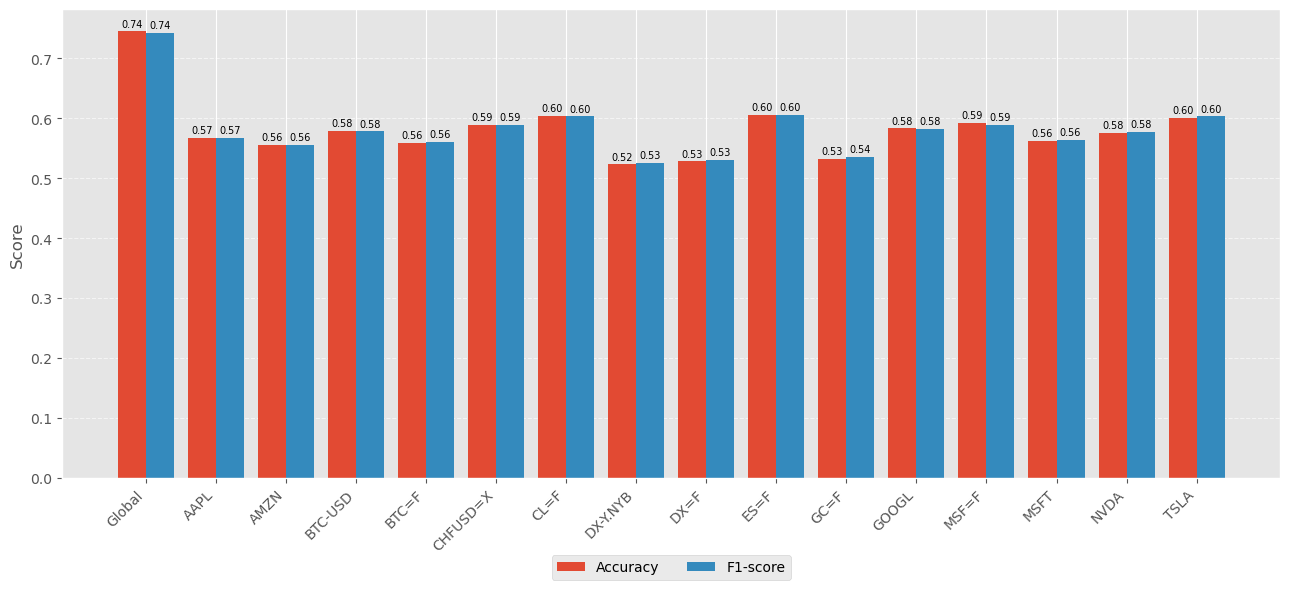

In [123]:
# Re-run the plot with annotation after code execution state reset
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

models = ["Global", "AAPL", "AMZN", "BTC-USD", "BTC=F", "CHFUSD=X", "CL=F", "DX-Y.NYB", "DX=F",
          "ES=F", "GC=F", "GOOGL", "MSF=F", "MSFT", "NVDA", "TSLA"]
accuracy = [0.745, 0.567, 0.555, 0.579, 0.559, 0.589, 0.604, 0.523, 0.528,
            0.605, 0.532, 0.583, 0.592, 0.562, 0.576, 0.601]
f1_score = [0.742, 0.567, 0.555, 0.578, 0.561, 0.589, 0.603, 0.526, 0.531,
            0.605, 0.535, 0.582, 0.589, 0.564, 0.577, 0.603]

x = np.arange(len(models))
bar_width = 0.4
accuracy_color = 'tomato'
f1_color = 'steelblue'

# Create the plot
fig, ax = plt.subplots(figsize=(13, 6))
bar1 = ax.bar(x - bar_width/2, accuracy, width=bar_width, label='Accuracy')
bar2 = ax.bar(x + bar_width/2, f1_score, width=bar_width, label='F1-score')

# Set labels and title
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Annotate all bars
for i in range(len(models)):
    ax.annotate(f'{accuracy[i]:.2f}', 
                 xy=(x[i] - bar_width/2, accuracy[i]), 
                 xytext=(0, 2), textcoords="offset points", 
                 ha='center', va='bottom', fontsize=7)
    ax.annotate(f'{f1_score[i]:.2f}', 
                 xy=(x[i] + bar_width/2, f1_score[i]), 
                 xytext=(0, 2), textcoords="offset points", 
                 ha='center', va='bottom', fontsize=7)

plt.tight_layout()
#plt.show()
plt.savefig("bar_plot_classic_accuracyf1.pdf", bbox_inches='tight')



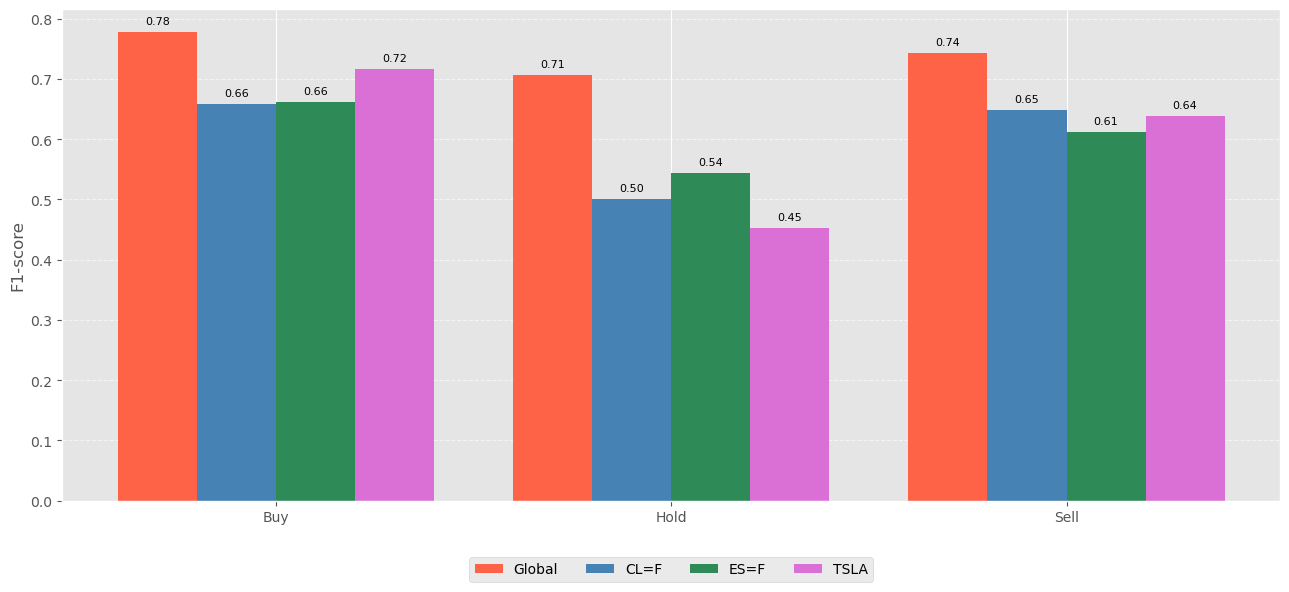

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define data based on the LaTeX table
models = ["Global", "CL=F", "ES=F", "TSLA"]
labels = ["Buy", "Hold", "Sell"]

# Performance metrics per label for each model
f1_scores = {
    "Global": [0.777, 0.706, 0.743],
    "CL=F": [0.658, 0.500, 0.649],
    "ES=F": [0.661, 0.543, 0.612],
    "TSLA": [0.716, 0.453, 0.639]
}

# Plot settings
x = np.arange(len(labels))
bar_width = 0.2
colors = ['tomato', 'steelblue', 'seagreen', 'orchid']

fig, ax = plt.subplots(figsize=(13, 6))

for i, model in enumerate(models):
    offset = (i - 1.5) * bar_width
    ax.bar(x + offset, f1_scores[model], width=bar_width, label=model, color=colors[i])

# Customization
ax.set_xticks(x)
ax.set_xticklabels([f"{label}" for label in labels])
ax.set_ylabel("F1-score")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(models))
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Annotate bars
def autolabel(bars, offset):
    for i, bar in enumerate(bars):
        height = f1_scores[models[offset]][i]
        ax.annotate(f'{height:.2f}',
                    xy=(x[i] + (offset - 1.5) * bar_width, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Annotate bars
for i, model in enumerate(models):
    offset = (i - 1.5) * bar_width
    for j in range(len(labels)):
        score = f1_scores[model][j]
        ax.text(x[j] + offset, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
#plt.show()
plt.savefig("bar_plot_classic_labels.pdf", bbox_inches='tight')



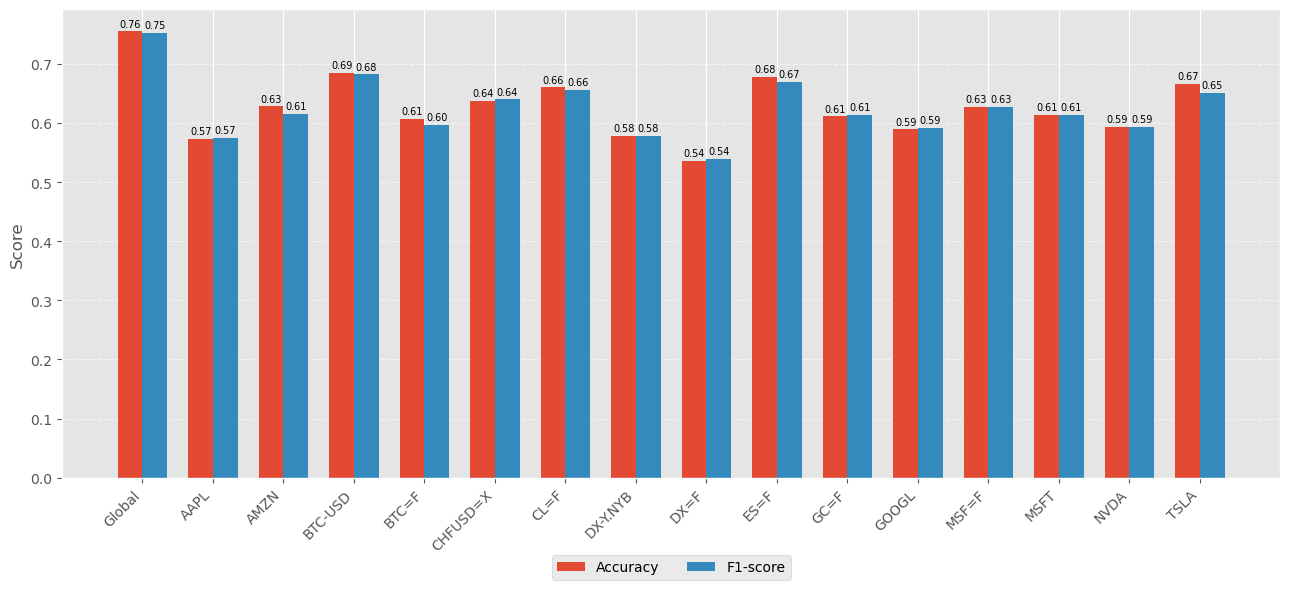

In [122]:
# Re-import after code reset
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# Data
models_1 = ["Global", "AAPL", "AMZN", "BTC-USD", "BTC=F", "CHFUSD=X", "CL=F", "DX-Y.NYB",
            "DX=F", "ES=F", "GC=F", "GOOGL", "MSF=F", "MSFT", "NVDA", "TSLA"]
accuracy_1 = [0.755, 0.573, 0.628, 0.685, 0.607, 0.637, 0.660, 0.578,
              0.536, 0.678, 0.611, 0.589, 0.627, 0.613, 0.593, 0.666]
f1_1 = [0.753, 0.575, 0.615, 0.682, 0.597, 0.640, 0.656, 0.578,
        0.539, 0.670, 0.613, 0.591, 0.627, 0.614, 0.593, 0.651]

x1 = np.arange(len(models_1))
bar_width = 0.35

# Create figure
fig1, ax1 = plt.subplots(figsize=(13, 6))
bar1_1 = ax1.bar(x1 - bar_width/2, accuracy_1, width=bar_width, label='Accuracy')
bar2_1 = ax1.bar(x1 + bar_width/2, f1_1, width=bar_width, label='F1-score')

ax1.set_ylabel('Score')
ax1.set_xticks(x1)
ax1.set_xticklabels(models_1, rotation=45, ha='right')
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Annotate top 3 bars for accuracy
top3_acc_indices = np.argsort(accuracy_1)[-16:]
for i in top3_acc_indices:
    ax1.annotate(f'{accuracy_1[i]:.2f}', 
                 xy=(x1[i] - bar_width/2, accuracy_1[i]), 
                 xytext=(0, 2), textcoords="offset points", 
                 ha='center', va='bottom', fontsize=7)

# Annotate top 3 bars for f1
top3_f1_indices = np.argsort(f1_1)[-16:]
for i in top3_f1_indices:
    ax1.annotate(f'{f1_1[i]:.2f}', 
                 xy=(x1[i] + bar_width/2, f1_1[i]), 
                 xytext=(0, 2), textcoords="offset points", 
                 ha='center', va='bottom', fontsize=7)

plt.tight_layout()
#plt.show()
plt.savefig("bar_plot_expanding_accuracyf1.pdf", bbox_inches='tight')





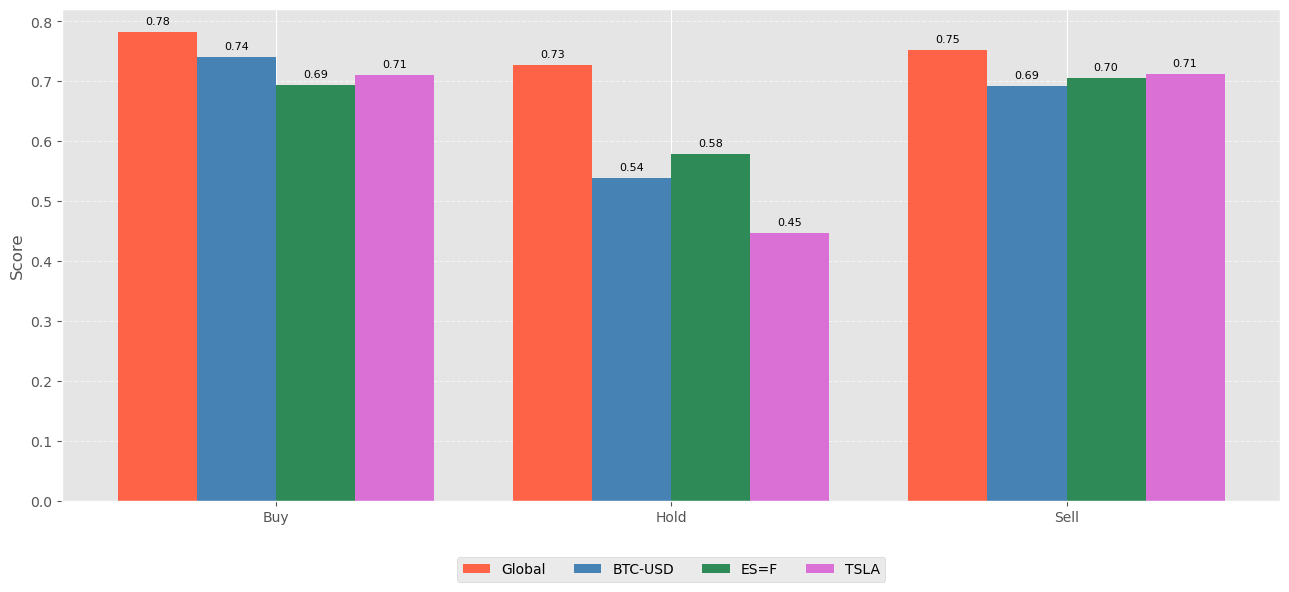

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
# Define data based on the LaTeX table
models = ["Global", "BTC-USD", "ES=F", "TSLA"]
labels = ["Buy", "Hold", "Sell"]

# Performance metrics per label for each model
f1_scores = {
    "Global": [0.781, 0.726, 0.751],
    "BTC-USD": [0.740, 0.539, 0.692],
    "ES=F": [0.694, 0.579, 0.705],
    "TSLA": [0.710, 0.446, 0.712]
}

# Plot settings
x = np.arange(len(labels))
bar_width = 0.2
colors = ['tomato', 'steelblue', 'seagreen', 'orchid']

fig, ax = plt.subplots(figsize=(13, 6))

for i, model in enumerate(models):
    offset = (i - 1.5) * bar_width
    ax.bar(x + offset, f1_scores[model], width=bar_width, label=model, color=colors[i])

# Customization
ax.set_xticks(x)
ax.set_xticklabels([f"{label}" for label in labels])
ax.set_ylabel("Score")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(models))
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Annotate bars
def autolabel(bars, offset):
    for i, bar in enumerate(bars):
        height = f1_scores[models[offset]][i]
        ax.annotate(f'{height:.2f}',
                    xy=(x[i] + (offset - 1.5) * bar_width, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Annotate bars
for i, model in enumerate(models):
    offset = (i - 1.5) * bar_width
    for j in range(len(labels)):
        score = f1_scores[model][j]
        ax.text(x[j] + offset, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
#plt.show()
plt.savefig("bar_plot_expanding_labels.pdf", bbox_inches='tight')


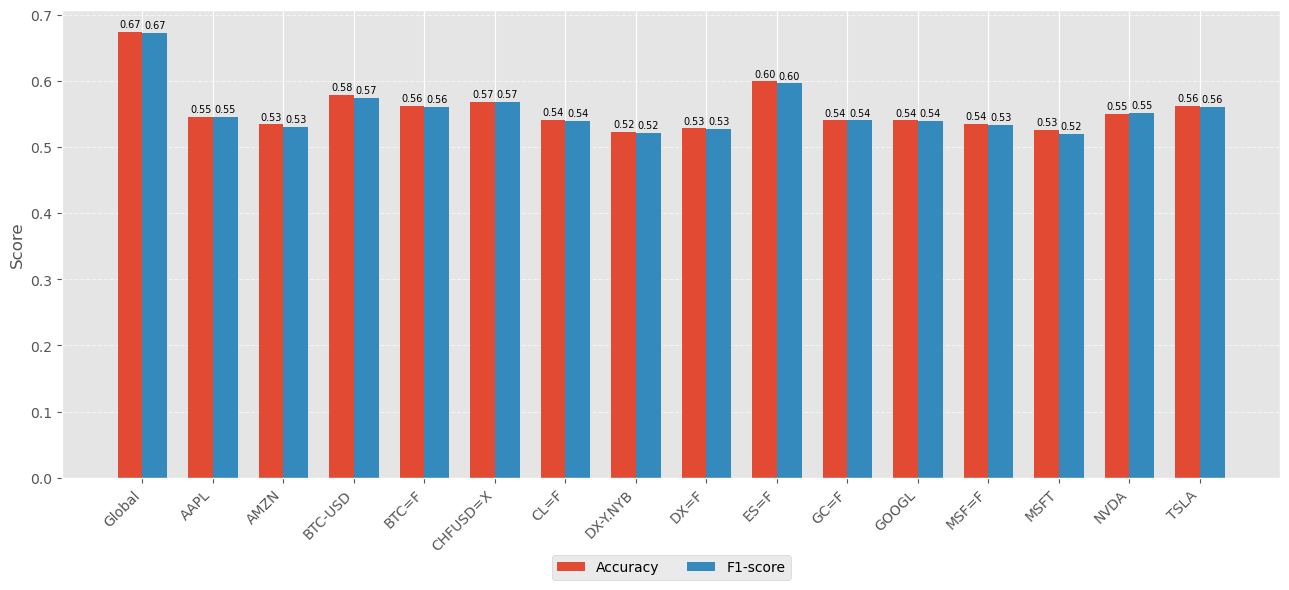

In [125]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


# --- Rolling Monthly Window Summary ---
models_1 = ["Global", "AAPL", "AMZN", "BTC-USD", "BTC=F", "CHFUSD=X", "CL=F", "DX-Y.NYB",
            "DX=F", "ES=F", "GC=F", "GOOGL", "MSF=F", "MSFT", "NVDA", "TSLA"]

# Values from the table in the image
accuracy_1 = [0.674, 0.546, 0.534, 0.578, 0.562, 0.568, 0.541, 0.523,
              0.528, 0.599, 0.540, 0.540, 0.535, 0.526, 0.550, 0.562]
f1_1 = [0.673, 0.546, 0.530, 0.574, 0.560, 0.568, 0.539, 0.521,
        0.527, 0.596, 0.540, 0.539, 0.533, 0.520, 0.551, 0.560]

x1 = np.arange(len(models_1))
bar_width = 0.35

fig1, ax1 = plt.subplots(figsize=(13, 6))
bar1_1 = ax1.bar(x1 - bar_width/2, accuracy_1, width=bar_width, label='Accuracy')
bar2_1 = ax1.bar(x1 + bar_width/2, f1_1, width=bar_width, label='F1-score')

ax1.set_ylabel('Score')
ax1.set_xticks(x1)
ax1.set_xticklabels(models_1, rotation=45, ha='right')
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Annotate top 3 bars for accuracy
top3_acc_indices = np.argsort(accuracy_1)[-16:]
for i in top3_acc_indices:
    ax1.annotate(f'{accuracy_1[i]:.2f}', 
                 xy=(x1[i] - bar_width/2, accuracy_1[i]), 
                 xytext=(0, 2), textcoords="offset points", 
                 ha='center', va='bottom', fontsize=7)

# Annotate top 3 bars for f1
top3_f1_indices = np.argsort(f1_1)[-16:]
for i in top3_f1_indices:
    ax1.annotate(f'{f1_1[i]:.2f}', 
                 xy=(x1[i] + bar_width/2, f1_1[i]), 
                 xytext=(0, 2), textcoords="offset points", 
                 ha='center', va='bottom', fontsize=7)

plt.tight_layout()
#plt.show()
plt.savefig("bar_plot_rolling_accuracyf1.pdf", bbox_inches='tight')



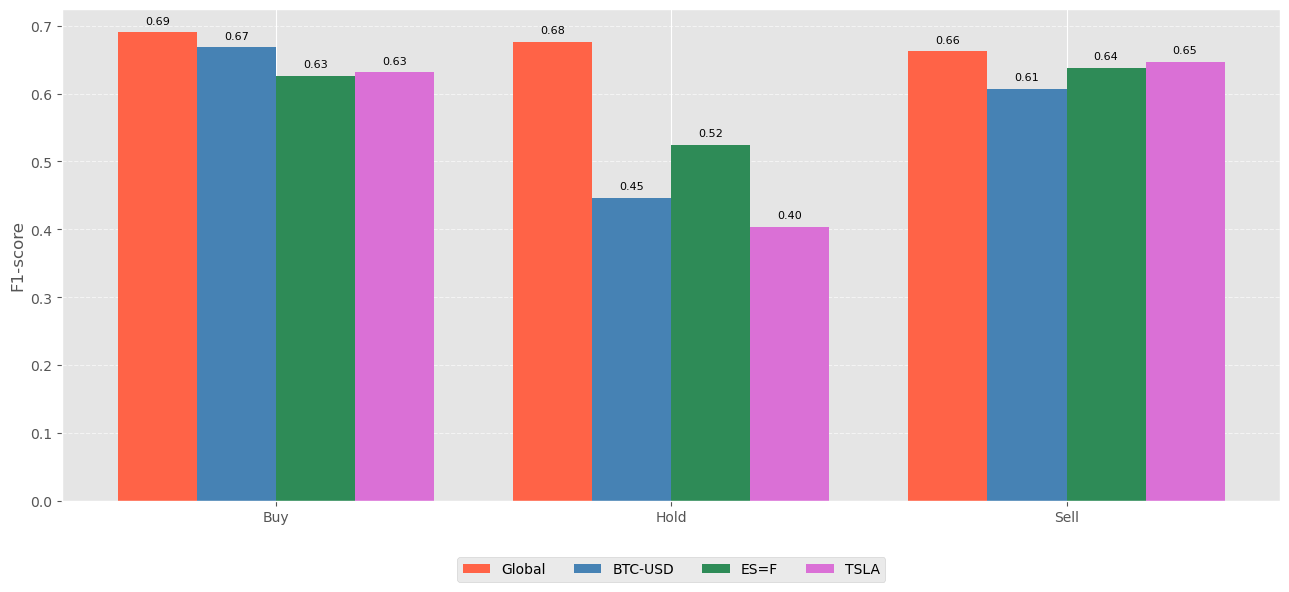

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
# Define data based on the LaTeX table
models = ["Global", "BTC-USD", "ES=F", "TSLA"]
labels = ["Buy", "Hold", "Sell"]

# Performance metrics per label for each model
f1_scores = {
    "Global": [0.690, 0.676, 0.662],
    "BTC-USD": [0.668, 0.446, 0.607],
    "ES=F": [0.626, 0.524, 0.638],
    "TSLA": [0.631, 0.403, 0.646]
}

# Plot settings
x = np.arange(len(labels))
bar_width = 0.2
colors = ['tomato', 'steelblue', 'seagreen', 'orchid']

fig, ax = plt.subplots(figsize=(13, 6))

for i, model in enumerate(models):
    offset = (i - 1.5) * bar_width
    ax.bar(x + offset, f1_scores[model], width=bar_width, label=model, color=colors[i])

# Customization
ax.set_xticks(x)
ax.set_xticklabels([f"{label}" for label in labels])
ax.set_ylabel("F1-score")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(models))
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Annotate bars
def autolabel(bars, offset):
    for i, bar in enumerate(bars):
        height = f1_scores[models[offset]][i]
        ax.annotate(f'{height:.2f}',
                    xy=(x[i] + (offset - 1.5) * bar_width, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Annotate bars
for i, model in enumerate(models):
    offset = (i - 1.5) * bar_width
    for j in range(len(labels)):
        score = f1_scores[model][j]
        ax.text(x[j] + offset, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
#plt.show()
plt.savefig("bar_plot_rolling_labels.pdf", bbox_inches='tight')


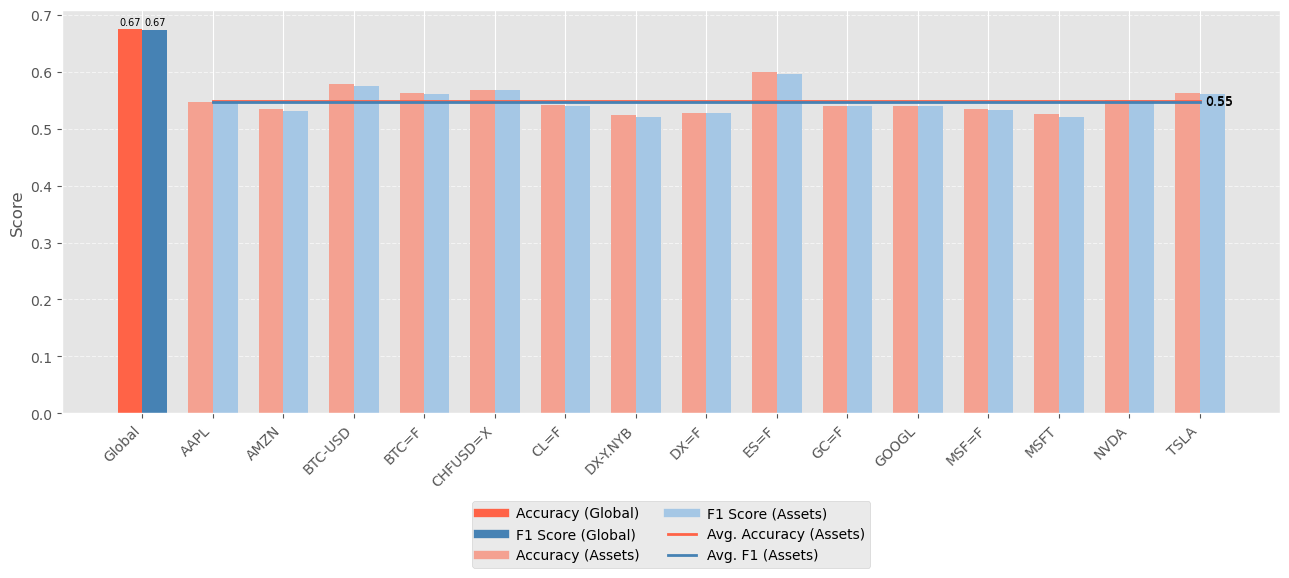

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# --- Rolling Monthly Window Summary ---
models_1 = ["Global", "AAPL", "AMZN", "BTC-USD", "BTC=F", "CHFUSD=X", "CL=F", "DX-Y.NYB",
            "DX=F", "ES=F", "GC=F", "GOOGL", "MSF=F", "MSFT", "NVDA", "TSLA"]

accuracy_1 = [0.674, 0.546, 0.534, 0.578, 0.562, 0.568, 0.541, 0.523,
              0.528, 0.599, 0.540, 0.540, 0.535, 0.526, 0.550, 0.562]
f1_1 = [0.673, 0.546, 0.530, 0.574, 0.560, 0.568, 0.539, 0.521,
        0.527, 0.596, 0.540, 0.539, 0.533, 0.520, 0.551, 0.560]

x1 = np.arange(len(models_1))
bar_width = 0.35

# Colors
strong_accuracy = 'tomato'
strong_f1 = 'steelblue'
light_accuracy = '#f4a191'
light_f1 = '#a5c7e5'

fig1, ax1 = plt.subplots(figsize=(13, 6))

for i, label in enumerate(models_1):
    is_global = (label == "Global")
    acc_color = strong_accuracy if is_global else light_accuracy
    f1_color = strong_f1 if is_global else light_f1
    
    ax1.bar(x1[i] - bar_width/2, accuracy_1[i], width=bar_width, color=acc_color)
    ax1.bar(x1[i] + bar_width/2, f1_1[i], width=bar_width, color=f1_color)

    if is_global:
        ax1.annotate(f'{accuracy_1[i]:.2f}',
                     xy=(x1[i] - bar_width/2, accuracy_1[i]),
                     xytext=(0, 2), textcoords="offset points",
                     ha='center', va='bottom', fontsize=7)
        ax1.annotate(f'{f1_1[i]:.2f}',
                     xy=(x1[i] + bar_width/2, f1_1[i]),
                     xytext=(0, 2), textcoords="offset points",
                     ha='center', va='bottom', fontsize=7)

# Compute asset-only averages
asset_indices = [i for i, m in enumerate(models_1) if m != "Global"]
mean_acc = np.mean([accuracy_1[i] for i in asset_indices])
mean_f1 = np.mean([f1_1[i] for i in asset_indices])

# Plot average lines
ax1.plot(x1[asset_indices], [mean_acc]*len(asset_indices),
         color=strong_accuracy, linestyle='-', linewidth=2, label="Avg. Accuracy (Assets)")
ax1.plot(x1[asset_indices], [mean_f1]*len(asset_indices),
         color=strong_f1, linestyle='-', linewidth=2, label="Avg. F1 (Assets)")

# Annotate average lines
ax1.annotate(f'{mean_acc:.2f}', xy=(x1[asset_indices[-1]], mean_acc),
             xytext=(4, 0), textcoords="offset points", color='black', va='center', fontsize=9)
ax1.annotate(f'{mean_f1:.2f}', xy=(x1[asset_indices[-1]], mean_f1),
             xytext=(4, 0), textcoords="offset points", color='black', va='center', fontsize=9)

# Axis and labels
ax1.set_ylabel('Score')
ax1.set_xticks(x1)
ax1.set_xticklabels(models_1, rotation=45, ha='right')
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)

# Legend
import matplotlib.lines as mlines
custom_lines = [
    mlines.Line2D([], [], color=strong_accuracy, lw=6),
    mlines.Line2D([], [], color=strong_f1, lw=6),
    mlines.Line2D([], [], color=light_accuracy, lw=6),
    mlines.Line2D([], [], color=light_f1, lw=6),
    mlines.Line2D([], [], color=strong_accuracy, lw=2),
    mlines.Line2D([], [], color=strong_f1, lw=2)
]
ax1.legend(custom_lines, [
    'Accuracy (Global)', 'F1 Score (Global)',
    'Accuracy (Assets)', 'F1 Score (Assets)',
    'Avg. Accuracy (Assets)', 'Avg. F1 (Assets)'
], loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=2)

plt.tight_layout()
plt.savefig("bar_plot_rolling_accuracyf1.pdf", bbox_inches='tight')
# plt.show()


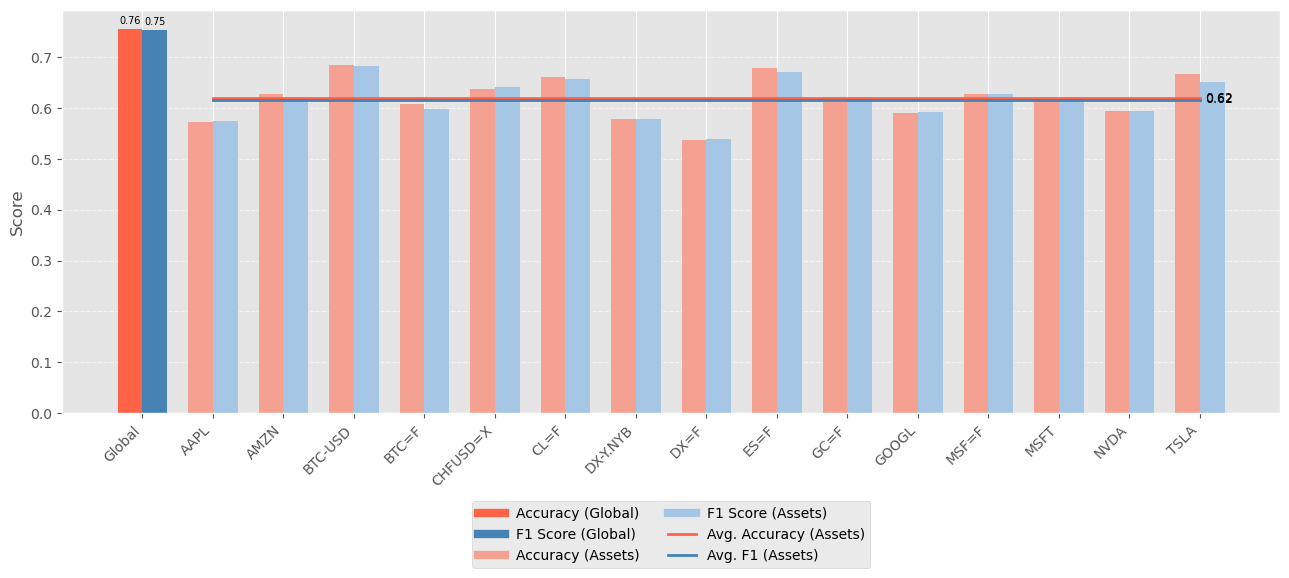

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# Data
models_1 = ["Global", "AAPL", "AMZN", "BTC-USD", "BTC=F", "CHFUSD=X", "CL=F", "DX-Y.NYB",
            "DX=F", "ES=F", "GC=F", "GOOGL", "MSF=F", "MSFT", "NVDA", "TSLA"]
accuracy_1 = [0.755, 0.573, 0.628, 0.685, 0.607, 0.637, 0.660, 0.578,
              0.536, 0.678, 0.611, 0.589, 0.627, 0.613, 0.593, 0.666]
f1_1 = [0.753, 0.575, 0.615, 0.682, 0.597, 0.640, 0.656, 0.578,
        0.539, 0.670, 0.613, 0.591, 0.627, 0.614, 0.593, 0.651]

x1 = np.arange(len(models_1))
bar_width = 0.35

# Colors
strong_accuracy = 'tomato'
strong_f1 = 'steelblue'
light_accuracy = '#f4a191'
light_f1 = '#a5c7e5'

# Create figure
fig1, ax1 = plt.subplots(figsize=(13, 6))

for i, label in enumerate(models_1):
    is_global = (label == "Global")
    acc_color = strong_accuracy if is_global else light_accuracy
    f1_color = strong_f1 if is_global else light_f1

    ax1.bar(x1[i] - bar_width/2, accuracy_1[i], width=bar_width, color=acc_color)
    ax1.bar(x1[i] + bar_width/2, f1_1[i], width=bar_width, color=f1_color)

    if is_global:
        ax1.annotate(f'{accuracy_1[i]:.2f}',
                     xy=(x1[i] - bar_width/2, accuracy_1[i]),
                     xytext=(0, 2), textcoords="offset points",
                     ha='center', va='bottom', fontsize=7)
        ax1.annotate(f'{f1_1[i]:.2f}',
                     xy=(x1[i] + bar_width/2, f1_1[i]),
                     xytext=(0, 2), textcoords="offset points",
                     ha='center', va='bottom', fontsize=7)

# Compute asset-only averages
asset_indices = [i for i, m in enumerate(models_1) if m != "Global"]
mean_acc = np.mean([accuracy_1[i] for i in asset_indices])
mean_f1 = np.mean([f1_1[i] for i in asset_indices])

# Average lines
ax1.plot(x1[asset_indices], [mean_acc]*len(asset_indices),
         color=strong_accuracy, linestyle='-', linewidth=2, label='Avg. Accuracy (Assets)')
ax1.plot(x1[asset_indices], [mean_f1]*len(asset_indices),
         color=strong_f1, linestyle='-', linewidth=2, label='Avg. F1 (Assets)')

# Annotate line ends
ax1.annotate(f'{mean_acc:.2f}', xy=(x1[asset_indices[-1]], mean_acc),
             xytext=(4, 0), textcoords="offset points", color='black', va='center', fontsize=9)
ax1.annotate(f'{mean_f1:.2f}', xy=(x1[asset_indices[-1]], mean_f1),
             xytext=(4, 0), textcoords="offset points", color='black', va='center', fontsize=9)

# Axis and ticks
ax1.set_ylabel('Score')
ax1.set_xticks(x1)
ax1.set_xticklabels(models_1, rotation=45, ha='right')
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)

# Legend
import matplotlib.lines as mlines
custom_lines = [
    mlines.Line2D([], [], color=strong_accuracy, lw=6),
    mlines.Line2D([], [], color=strong_f1, lw=6),
    mlines.Line2D([], [], color=light_accuracy, lw=6),
    mlines.Line2D([], [], color=light_f1, lw=6),
    mlines.Line2D([], [], color=strong_accuracy, lw=2),
    mlines.Line2D([], [], color=strong_f1, lw=2)
]
ax1.legend(custom_lines, [
    'Accuracy (Global)', 'F1 Score (Global)',
    'Accuracy (Assets)', 'F1 Score (Assets)',
    'Avg. Accuracy (Assets)', 'Avg. F1 (Assets)'
], loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=2)

plt.tight_layout()
plt.savefig("bar_plot_expanding_accuracyf1.pdf", bbox_inches='tight')
# plt.show()


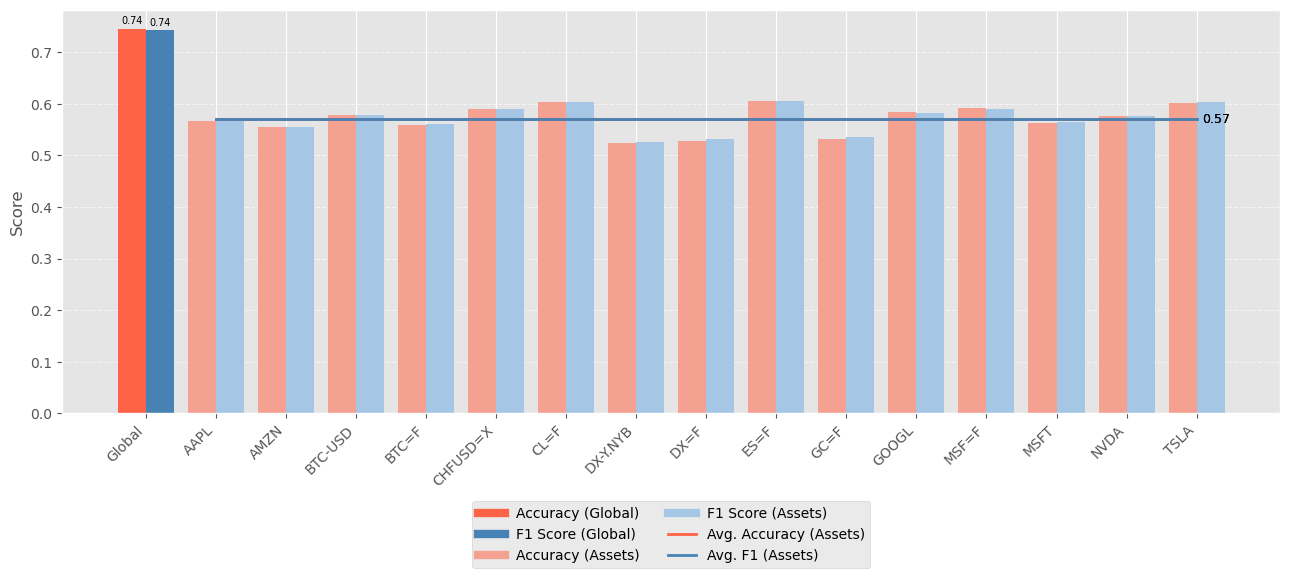

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

models = ["Global", "AAPL", "AMZN", "BTC-USD", "BTC=F", "CHFUSD=X", "CL=F", "DX-Y.NYB", "DX=F",
          "ES=F", "GC=F", "GOOGL", "MSF=F", "MSFT", "NVDA", "TSLA"]
accuracy = [0.745, 0.567, 0.555, 0.579, 0.559, 0.589, 0.604, 0.523, 0.528,
            0.605, 0.532, 0.583, 0.592, 0.562, 0.576, 0.601]
f1_score = [0.742, 0.567, 0.555, 0.578, 0.561, 0.589, 0.603, 0.526, 0.531,
            0.605, 0.535, 0.582, 0.589, 0.564, 0.577, 0.603]

x = np.arange(len(models))
bar_width = 0.4

# Colors
strong_accuracy = 'tomato'
strong_f1 = 'steelblue'
light_accuracy = '#f4a191'
light_f1 = '#a5c7e5'

# Create the plot
fig, ax = plt.subplots(figsize=(13, 6))

for i, label in enumerate(models):
    is_global = (label == "Global")
    acc_color = strong_accuracy if is_global else light_accuracy
    f1_color = strong_f1 if is_global else light_f1

    ax.bar(x[i] - bar_width/2, accuracy[i], width=bar_width, color=acc_color)
    ax.bar(x[i] + bar_width/2, f1_score[i], width=bar_width, color=f1_color)

    if is_global:
        ax.annotate(f'{accuracy[i]:.2f}', 
                    xy=(x[i] - bar_width/2, accuracy[i]), 
                    xytext=(0, 2), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=7)
        ax.annotate(f'{f1_score[i]:.2f}', 
                    xy=(x[i] + bar_width/2, f1_score[i]), 
                    xytext=(0, 2), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=7)

# Average lines for asset-only values
asset_indices = [i for i, label in enumerate(models) if label != "Global"]
mean_acc = np.mean([accuracy[i] for i in asset_indices])
mean_f1 = np.mean([f1_score[i] for i in asset_indices])

ax.plot(x[asset_indices], [mean_acc] * len(asset_indices),
        color=strong_accuracy, linestyle='-', linewidth=2, label='Avg. Accuracy (Assets)')
ax.plot(x[asset_indices], [mean_f1] * len(asset_indices),
        color=strong_f1, linestyle='-', linewidth=2, label='Avg. F1 (Assets)')

# Annotate average lines
ax.annotate(f'{mean_acc:.2f}', xy=(x[asset_indices[-1]], mean_acc),
            xytext=(4, 0), textcoords="offset points", color='black', va='center', fontsize=9)
ax.annotate(f'{mean_f1:.2f}', xy=(x[asset_indices[-1]], mean_f1),
            xytext=(4, 0), textcoords="offset points", color='black', va='center', fontsize=9)

# Axis and labels
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Custom legend
import matplotlib.lines as mlines
custom_lines = [
    mlines.Line2D([], [], color=strong_accuracy, lw=6),
    mlines.Line2D([], [], color=strong_f1, lw=6),
    mlines.Line2D([], [], color=light_accuracy, lw=6),
    mlines.Line2D([], [], color=light_f1, lw=6),
    mlines.Line2D([], [], color=strong_accuracy, lw=2),
    mlines.Line2D([], [], color=strong_f1, lw=2),
]
ax.legend(custom_lines, [
    'Accuracy (Global)', 'F1 Score (Global)',
    'Accuracy (Assets)', 'F1 Score (Assets)',
    'Avg. Accuracy (Assets)', 'Avg. F1 (Assets)'
], loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=2)

plt.tight_layout()
plt.savefig("bar_plot_classic_accuracyf1.pdf", bbox_inches='tight')
# plt.show()


In [3]:
df = pd.read_csv("backtest_data/classic/AAPL.csv")
print(df["Close"])

0      169.230927
1      168.046494
2      168.852692
3      168.026627
4      168.783020
          ...    
247    221.529999
248    223.850006
249    217.899994
250    222.130005
251    223.190002
Name: Close, Length: 252, dtype: float64
